# Perceptron Multicapa con clasificador multicategórico

In [3]:
# importamos librerías necesarias
import tensorflow as tf
from tensorflow import keras
import numpy as np
import sys
import matplotlib.pyplot as plt

from keras.utils import to_categorical
from keras.layers import Dense

import pandas as pd

# versiones de los paquetes
print(tf.__version__)


2.15.0


In [4]:
# Definimos funciones

# esta funcion nos va a servir para ver la historia de la red
# como ha ido cambiando el loss y el accuracy

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['loss'],'r--',
           label='Training Error')
  plt.plot(hist['epoch'], hist['accuracy'],'b',
           label = 'accuracy')
  #plt.ylim([0,20])
  plt.legend()
  plt.show() # un €

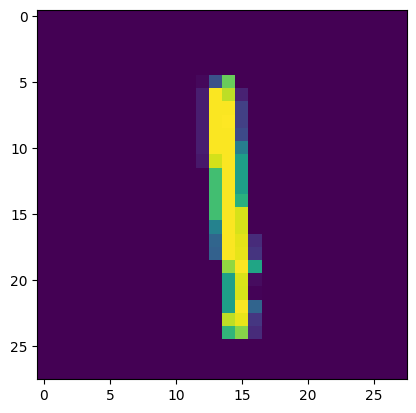

In [5]:
# Los datos ya estan incorporados en Keras, los cargamos con esta función
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# visualizamos la imagen 8
plt.imshow(x_train[8])
plt.show()

Fíjate que en una única llamada a mnist.load_data() hemos cargado todo, los conjuntos de entrenamiento (x_train, y_train) y los conjuntos de evaluación (x_test, y_test)

No te preocupes mucho, simplemente Keras ha definido la carga de esos ficheros de esa manera.

La última parte del código sirve para visualizar las imágenes


```
# visualizamos la imagen 8
plt.imshow(x_train[8])
plt.show()
```
Si cambias el número 8 puedes ir viendo otras imágenes, tienes 60000 para elegir. Aunque aparezca en color es por la función usada imshow que las colorea, en realidad son escala de grises

In [6]:
# comprobamos las caracteristicas del set de entrenamiento
print(x_train.ndim)
print(x_train.shape)
print(y_train.ndim)
print(y_train.shape)

3
(60000, 28, 28)
1
(60000,)


Las dimensiones son las correctas, x es una matriz de 3 dimensiones: 60000x28x28 e y un vector de 600000

In [7]:
# guardamos las dimensiones en variables para hacer la red mas generica
# y reutilizable

ntrain = x_train.shape[0]
ntest  = x_test.shape[0]
dimf = x_train.shape[1]
dimc = x_train.shape[2]

print("dimensiones: ", ntrain, ntest, dimf, dimc)

dimensiones:  60000 10000 28 28


##Preprocesado

Hay que preparar las imágenes para que entren en la red, vamos a hacer dos cosas:
1. Vectorizarlas
1. Normalizarlas, haciendo que vayan de 0 a 1 en vez de 0 a 255
1. Convertir y en una matriz one hot


In [8]:
# Preprocesamos los datos vectorizando y normalizando las imagenes

x_train = x_train.astype('float32')/255.
x_train = x_train.reshape(ntrain, dimf*dimc)

x_test = x_test.astype('float32')/255.
x_test = x_test.reshape(ntest, dimf*dimc)

# comprobamos que la dimension de x es correcta
print(x_train.shape)

(60000, 784)


Ahora tenemos 60000 vectores de 784 (28x28) píxeles


Creamos con y la matriz de onehot

In [9]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(y_train.shape)

(60000, 10)


In [46]:
# Especificamos el modelo
# Una unica capa oculta con 10 sigmoides
# Una capa de salida con 10 softmax, una para cada categoria

model = keras.Sequential()
model.add(Dense(100, activation='relu', input_shape=(dimf*dimc,)))
model.add(Dense(10, activation = 'softmax'))
model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 100)               78500     
                                                                 
 dense_21 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [105]:
# compilamos el modelo
model.compile(loss="categorical_crossentropy",
              optimizer="sgd", # stochastic gradient descent
              metrics= ['accuracy'])


In [47]:
# compilamos el modelo

model.compile(loss="categorical_crossentropy",
              optimizer= tf.keras.optimizers.RMSprop(lr=0.001),
              metrics= ['accuracy'])


In [48]:
# hacemos el entrenamiento

history = model.fit(x_train, y_train, epochs=100,  batch_size=1000)

Epoch 1/100
60/60 [==============================] - 1s 6ms/step - loss: 0.7063 - accuracy: 0.8270
Epoch 2/100
60/60 [==============================] - 0s 6ms/step - loss: 0.3227 - accuracy: 0.9111
Epoch 3/100
60/60 [==============================] - 0s 6ms/step - loss: 0.2607 - accuracy: 0.9270
Epoch 4/100
60/60 [==============================] - 0s 8ms/step - loss: 0.2238 - accuracy: 0.9377
Epoch 5/100
60/60 [==============================] - 1s 9ms/step - loss: 0.1970 - accuracy: 0.9448
Epoch 6/100
60/60 [==============================] - 0s 7ms/step - loss: 0.1770 - accuracy: 0.9500
Epoch 7/100
60/60 [==============================] - 0s 8ms/step - loss: 0.1593 - accuracy: 0.9543
Epoch 8/100
60/60 [==============================] - 0s 8ms/step - loss: 0.1448 - accuracy: 0.9592
Epoch 9/100
60/60 [==============================] - 0s 7ms/step - loss: 0.1320 - accuracy: 0.9631
Epoch 10/100
60/60 [==============================] - 0s 8ms/step - loss: 0.1220 - accuracy: 0.9656
Epoch 11/

El batch_size no ha sido aún explicado, simplemente úsalo así, en esencia lo que estamos haciendo es utilizar lotes de 1000 y hacer el backpropagation, así se entrena la red mucho más rápido.



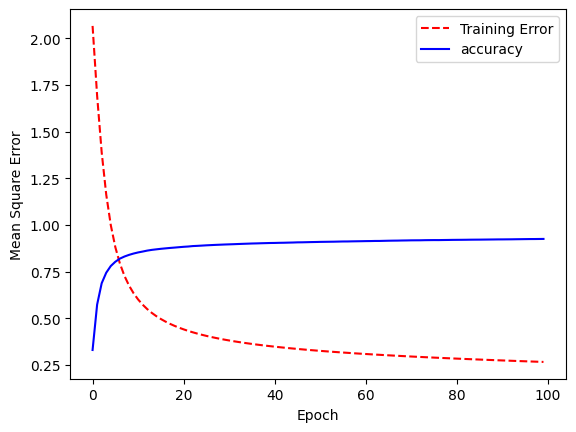

In [33]:
# hacemos un plot para ver si aprende adecuadamente
plot_history(history)

In [49]:
# evaluacion final con el test_set

test_loss, test_acc = model.evaluate(x_test, y_test)
print('test accuracy: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0860 - accuracy: 0.9793
test accuracy:  0.9793000221252441


Aproximadamente un 83% de precisión en la clasificación. Está muy bien para ser matrices vectorizadas

Vamos a ver la salida de la capa de neuronas softmax, la salida de la red.

In [21]:
yp = model.predict(x_test)

print(yp[11])
print(np.argmax(yp[11]))


313/313 [==============================] - 1s 1ms/step
[1.7949442e-03 7.2706162e-06 5.1162500e-02 7.0075337e-03 3.8208924e-02
 3.9845826e-03 7.3918378e-01 4.5145398e-06 1.5826918e-01 3.7685226e-04]
6


La categoria final es la de la neurona que tenga el valor más alto. En este caso la 6 (en python se empieza a contar en 0)

# Ejercicio

Prueba a modificar los hiperparámetros de la red e incluso su arquitectura para obtener una mejor clasificación. Por ejemplo podrías hacer lo siguiente:

1. Prueba a utilizar otros tipos de neuronas (RelU o tanh)
1. Prueba a incrementar el número de capas y de neuronas
1. Prueba a cambiar el batch_size
1. Prueba a utilizar otros optimizadores como adam o RMSprop



```
model.compile(loss="categorical_crossentropy",
              optimizer= tf.keras.optimizers.Adam(lr=0.001),
              metrics= ['accuracy'])
```



```
model.compile(loss="categorical_crossentropy",
              optimizer= tf.keras.optimizers.RMSprop(lr=0.001),
              metrics= ['accuracy'])
```


Haz las pruebas que consideres interesantes e interpreta los resultados.

Pega el código empleado (solo las partes que has cambiado) en la ventana de abajo

Para saber cómo modificar la red o cambiar de optimizador simplemente usa google, te aportará miles de ejemplos

Recuerda que los resultados tienes que subirlos a un cuestionario de moodle

### Modificación de las neuronas de activación



#### Usando ReLU



In [24]:
# Una unica capa oculta con 10 ReLU


model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(dimf*dimc,)))
model.add(Dense(10, activation = 'softmax'))
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                7850      
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [81]:
# Evaluacion final con el test_set

test_loss, test_acc = model.evaluate(x_test, y_test)
print('test accuracy: ', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3071 - accuracy: 0.9139
test accuracy:  0.9139000177383423


#### Usando Tanh



(tu codigo por aquí)

Como se puede observar, manteniendo el mismo número de capas y neuronas (una capa y 10 neuronas), mientras que usando sigmoid se obtenía un *test accuracy* de 0.83, usando ReLU se ha obtenido un valor de 0.91 y usando Tanh --.

### Modificación del número de capas y de neuronas

#### Usando ReLU



In [ ]:
# Una unica capa oculta con 50 ReLU


model = keras.Sequential()
model.add(Dense(50, activation='relu', input_shape=(dimf*dimc,)))
model.add(Dense(10, activation = 'softmax'))
model.summary()


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 50)                39250     
                                                                 
 dense_34 (Dense)            (None, 10)                510       
                                                                 
Total params: 39760 (155.31 KB)
Trainable params: 39760 (155.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Evaluacion final con el test_set

test_loss, test_acc = model.evaluate(x_test, y_test)
print('test accuracy: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2777 - accuracy: 0.9221
test accuracy:  0.9221000075340271


In [ ]:
# Una unica capa oculta con 100 ReLU


model = keras.Sequential()
model.add(Dense(100, activation='relu', input_shape=(dimf*dimc,)))
model.add(Dense(10, activation = 'softmax'))
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 100)               78500     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Evaluacion final con el test_set

test_loss, test_acc = model.evaluate(x_test, y_test)
print('test accuracy: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2575 - accuracy: 0.9279
test accuracy:  0.9279000163078308


In [ ]:
# Dos capas ocultas con 10 ReLU cada una


model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(dimf*dimc,)))
model.add(Dense(10, activation='relu', input_shape=(dimf*dimc,)))
model.add(Dense(10, activation = 'softmax'))
model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 10)                7850      
                                                                 
 dense_19 (Dense)            (None, 10)                110       


                                                                 
 dense_20 (Dense)            (None, 10)                110       
                                                                 
Total params: 8070 (31.52 KB)
Trainable params: 8070 (31.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Evaluacion final con el test_set

test_loss, test_acc = model.evaluate(x_test, y_test)
print('test accuracy: ', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.3594 - accuracy: 0.8940
test accuracy:  0.8939999938011169


In [ ]:
# Dos capas ocultas con 50 ReLU cada una


model = keras.Sequential()
model.add(Dense(50, activation='relu', input_shape=(dimf*dimc,)))
model.add(Dense(50, activation='relu', input_shape=(dimf*dimc,)))
model.add(Dense(10, activation = 'softmax'))
model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 50)                39250     
                                                                 


 dense_25 (Dense)            (None, 50)                2550      
                                                                 
 dense_26 (Dense)            (None, 10)                510       
                                                                 
Total params: 42310 (165.27 KB)
Trainable params: 42310 (165.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Evaluacion final con el test_set

test_loss, test_acc = model.evaluate(x_test, y_test)
print('test accuracy: ', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.2281 - accuracy: 0.9323
test accuracy:  0.9322999715805054


In [ ]:
# Dos capas ocultas con 100 ReLU cada una


model = keras.Sequential()
model.add(Dense(100, activation='relu', input_shape=(dimf*dimc,)))
model.add(Dense(100, activation='relu', input_shape=(dimf*dimc,)))
model.add(Dense(10, activation = 'softmax'))
model.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


 dense_30 (Dense)            (None, 100)               78500     
                                                                 
 dense_31 (Dense)            (None, 100)               10100     
                                                                 
 dense_32 (Dense)            (None, 10)                1010      
                                                                 
Total params: 89610 (350.04 KB)
Trainable params: 89610 (350.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Evaluacion final con el test_set

test_loss, test_acc = model.evaluate(x_test, y_test)
print('test accuracy: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2191 - accuracy: 0.9381
test accuracy:  0.9380999803543091


In [ ]:
# Seis capas ocultas con 100 ReLU cada una


model = keras.Sequential()
model.add(Dense(100, activation='relu', input_shape=(dimf*dimc,)))
model.add(Dense(100, activation='relu', input_shape=(dimf*dimc,)))
model.add(Dense(100, activation='relu', input_shape=(dimf*dimc,)))
model.add(Dense(100, activation='relu', input_shape=(dimf*dimc,)))
model.add(Dense(100, activation='relu', input_shape=(dimf*dimc,)))
model.add(Dense(100, activation='relu', input_shape=(dimf*dimc,)))
model.add(Dense(10, activation = 'softmax'))
model.summary()


Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 100)               78500     
                                                                 
 dense_50 (Dense)            (None, 100)               10100     
                                                                 
 dense_51 (Dense)            (None, 100)               10100     
                                                                 
 dense_52 (Dense)            (None, 100)               10100     
                                                                 
 dense_53 (Dense)            (None, 100)               10100     
                                                                 
 dense_54 (Dense)            (None, 100)               10100     
                                                                 
 dense_55 (Dense)            (None, 10)              

In [94]:
# Evaluacion final con el test_set

test_loss, test_acc = model.evaluate(x_test, y_test)
print('test accuracy: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1394 - accuracy: 0.9568
test accuracy:  0.9567999839782715


En lo que respecta a las neuronas ReLU, se puede observar que según aumenta el número de capas y de neuronas por capa, el valor del *test accuray* también aumenta. De hecho, el modelo alcanza su máximo porcentaje con 6 capas y 100 neuronas en cada una.

#### Usando Tanh



(tu codigo por aquí)

### Modificación del batch_size



#### Usando ReLU



In [ ]:
# Hacer el entrenamiento con batch_size=100

history = model.fit(x_train, y_train, epochs=100,  batch_size=100)

Epoch 1/100
600/600 [==============================] - 1s 2ms/step - loss: 1.5873 - accuracy: 0.5271
Epoch 2/100
600/600 [==============================] - 1s 2ms/step - loss: 0.7832 - accuracy: 0.8012
Epoch 3/100
600/600 [==============================] - 1s 2ms/step - loss: 0.5841 - accuracy: 0.8432
Epoch 4/100
600/600 [==============================] - 1s 2ms/step - loss: 0.5022 - accuracy: 0.8622
Epoch 5/100
600/600 [==============================] - 2s 3ms/step - loss: 0.4569 - accuracy: 0.8734
Epoch 6/100
600/600 [==============================] - 2s 3ms/step - loss: 0.4271 - accuracy: 0.8814
Epoch 7/100
600/600 [==============================] - 1s 2ms/step - loss: 0.4054 - accuracy: 0.8867
Epoch 8/100
600/600 [==============================] - 1s 2ms/step - loss: 0.3888 - accuracy: 0.8910
Epoch 9/100
600/600 [==============================] - 2s 3ms/step - loss: 0.3756 - accuracy: 0.8946
Epoch 10/100
600/600 [==============================] - 1s 3ms/step - loss: 0.3649 - accura

In [ ]:
# Evaluacion final con el test_set

test_loss, test_acc = model.evaluate(x_test, y_test)
print('test accuracy: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2394 - accuracy: 0.9311
test accuracy:  0.9311000108718872


In [ ]:
# Hacer el entrenamiento con batch_size=3000

history = model.fit(x_train, y_train, epochs=100,  batch_size=3000)

Epoch 1/100
20/20 [==============================] - 0s 4ms/step - loss: 2.2320 - accuracy: 0.1546
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 2.1564 - accuracy: 0.2131
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 2.0833 - accuracy: 0.2693
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 2.0090 - accuracy: 0.3222
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 1.9348 - accuracy: 0.3742
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 1.8635 - accuracy: 0.4265
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 1.7953 - accuracy: 0.4794
Epoch 8/100
20/20 [==============================] - 0s 4ms/step - loss: 1.7294 - accuracy: 0.5249
Epoch 9/100
20/20 [==============================] - 0s 4ms/step - loss: 1.6653 - accuracy: 0.5650
Epoch 10/100
20/20 [==============================] - 0s 4ms/step - loss: 1.6025 - accuracy: 0.6002
Epoch 11/

In [ ]:
# Evaluacion final con el test_set

test_loss, test_acc = model.evaluate(x_test, y_test)
print('test accuracy: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.4072 - accuracy: 0.8879
test accuracy:  0.8878999948501587


In [ ]:
# Hacer el entrenamiento con batch_size=5000

history = model.fit(x_train, y_train, epochs=100,  batch_size=5000)

Epoch 1/100
12/12 [==============================] - 0s 6ms/step - loss: 2.2892 - accuracy: 0.1432
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 2.2305 - accuracy: 0.1770
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 2.1899 - accuracy: 0.2015
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 2.1558 - accuracy: 0.2196
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 2.1244 - accuracy: 0.2351
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 2.0943 - accuracy: 0.2503
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 2.0649 - accuracy: 0.2648
Epoch 8/100
12/12 [==============================] - 0s 6ms/step - loss: 2.0357 - accuracy: 0.2795
Epoch 9/100
12/12 [==============================] - 0s 5ms/step - loss: 2.0062 - accuracy: 0.2948
Epoch 10/100
12/12 [==============================] - 0s 5ms/step - loss: 1.9758 - accuracy: 0.3090
Epoch 11/

In [ ]:
# Evaluacion final con el test_set

test_loss, test_acc = model.evaluate(x_test, y_test)
print('test accuracy: ', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.5350 - accuracy: 0.8598
test accuracy:  0.8597999811172485


Continuando con la modificación del batch_size en la función ReLU usando una capa con 10 neuronas, se puede observar cómo, a medida que aumenta este, disminuye el *test accuracy*.

#### Usando Tanh



(tu codigo por aquí)

### Modificación de los optimizadores como adam o RMSprop



#### Usando ReLU



In [ ]:
# Compilar el modelo usando RMSprop

model.compile(loss="categorical_crossentropy",
              optimizer= tf.keras.optimizers.RMSprop(lr=0.001),
              metrics= ['accuracy'])


In [ ]:
# Evaluacion final con el test_set

test_loss, test_acc = model.evaluate(x_test, y_test)
print('test accuracy: ', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.2510 - accuracy: 0.9307
test accuracy:  0.9307000041007996


In [ ]:
# Compilar el modelo usando Adam

model.compile(loss="categorical_crossentropy",
              optimizer= tf.keras.optimizers.Adam(lr=0.001),
              metrics= ['accuracy'])


In [21]:
# Evaluacion final con el test_set

test_loss, test_acc = model.evaluate(x_test, y_test)
print('test accuracy: ', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.2311 - accuracy: 0.9373
test accuracy:  0.9373000264167786


Por último, en lo que respecta al uso de distintos optimizadores, si se emplean las mismas configuraciones que en el apartado anterior (una capa con 10 neuronas) y un batch_size de 1000, se puede observar cómo Adam es ligeramente más preciso que RMSprop, no obstante no es una diferencia importante. De hecho, cabe destacar que tras probar con varias configuaraciones (modificando el número de capas y neuronas) hemos visto que no hay diferencias entre usar uno u otro optimizador. 

Adicionalmente, el valor de *test accuracy* máximo que se ha podido conseguir ha sido de 0.9793 usando una única capa con 100 neuronas, el optimizador RMSprop y un batch_size de 1000.

#### Usando Tanh



(tu codigo por aquí)